In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
df = pd.read_csv('../data/DenverCrimesData.csv')

df = df.drop(columns=["OBJECTID", "GEO_X", "GEO_Y"])

df["FIRST_OCCURRENCE_DATE"] = pd.to_datetime(df['FIRST_OCCURRENCE_DATE'])
df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(df['LAST_OCCURRENCE_DATE'])
df["REPORTED_DATE"] = pd.to_datetime(df['REPORTED_DATE'])

df['YEAR'] = df["FIRST_OCCURRENCE_DATE"].dt.year
df['MONTH'] = df["FIRST_OCCURRENCE_DATE"].dt.month
df['DAY_OF_WEEK'] = df["FIRST_OCCURRENCE_DATE"].dt.day_of_week
df['HOUR'] = df['FIRST_OCCURRENCE_DATE'].dt.hour

df['NEIGHBORHOOD_CLEAN'] = df['NEIGHBORHOOD_ID'].str.replace('-', ' ').str.title()

/var/folders/mk/ykv3j_d10z7fbbylyxfw79ym0000gn/T/ipykernel_35409/321136347.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["LAST_OCCURRENCE_DATE"] = pd.to_datetime(df['LAST_OCCURRENCE_DATE'])


## Crimes by Year

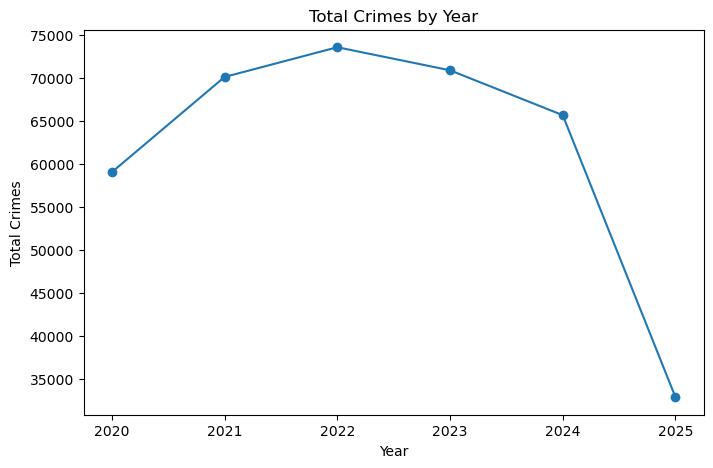

In [149]:
plt.figure(figsize=(8,5))

df.groupby("YEAR").size().sort_index().plot(kind='line', marker="o", title="Total Crimes by Year")

plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.xticks(df['YEAR'].sort_values().unique())
plt.show()

## Crimes by Month

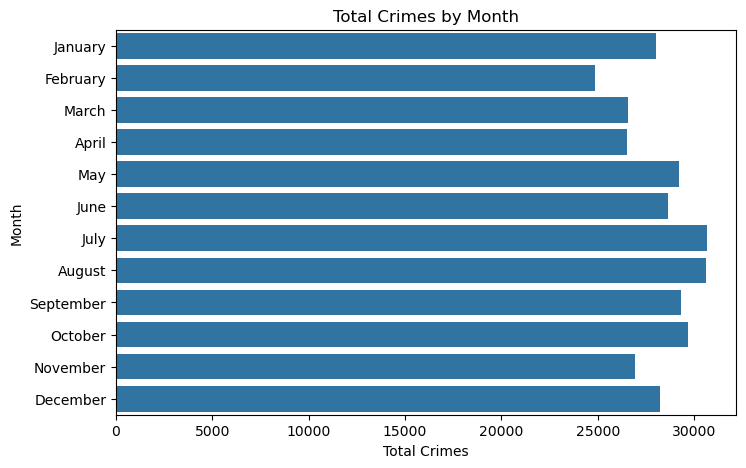

In [150]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_df = df[df['YEAR'].between(2020, 2024)].groupby("MONTH").size().reset_index(name="COUNT").sort_values("MONTH")
month_df['MONTH'] = month_order

plt.figure(figsize=(8, 5))

sns.barplot(data=month_df, x="COUNT", y="MONTH")

plt.title("Total Crimes by Month")
plt.xlabel("Total Crimes")
plt.ylabel("Month")
plt.show()

## Crimes by Day of the Week

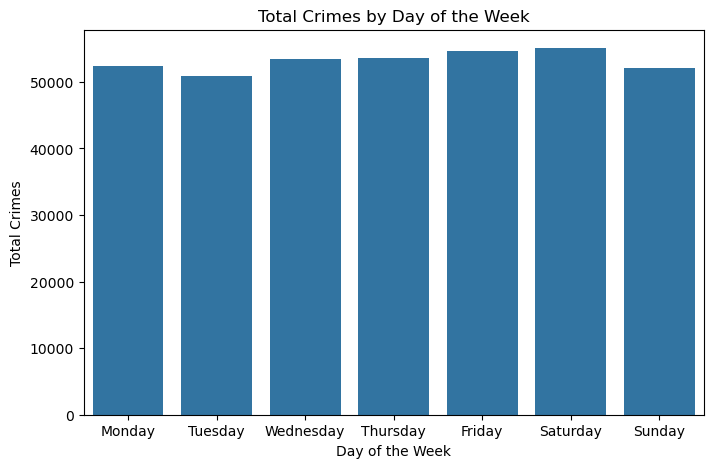

In [151]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_of_week_df = df.groupby("DAY_OF_WEEK").size().reset_index(name="COUNT").sort_values('DAY_OF_WEEK')
day_of_week_df['DAY_OF_WEEK'] = day_order

plt.figure(figsize=(8, 5))

sns.barplot(data=day_of_week_df, x="DAY_OF_WEEK", y="COUNT")

plt.title("Total Crimes by Day of the Week")
plt.xlabel('Day of the Week')
plt.xticks(df['DAY_OF_WEEK'].sort_values().unique())
plt.ylabel('Total Crimes')
plt.show()

## Crimes by Neighborhoods and Census Data

In [152]:
census_df = pd.read_csv('../data/DenverCensus2010.csv')
df = df.merge(census_df, left_on="NEIGHBORHOOD_CLEAN", right_on="NAME", how="inner")
df.head()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,...,SUM_Rented_Age_25_to_34,SUM_Rented_Age_35_to_44,SUM_Rented_Age_45_to_54,SUM_Rented_Age_55_to_59,SUM_Rented_Age_60_to_64,SUM_Rented_Age_65_to_74,SUM_Rented_Age_75_to_84,SUM_Rented_Age_85_Plus,Shape__Area,Shape__Length
0,DP20256007497,DP20256007497230800,2308,0,theft-from-bldg,larceny,2025-05-24 06:55:00,2025-05-23 23:59:00,2025-05-24 11:32:00,3403 N BRIGHTON BLVD,...,1992,679,479,199,154,175,91,29,4.924220e+07,33172.464966
1,DP2025254525,DP2025254525239901,2399,1,theft-bicycle,larceny,2025-05-20 00:00:00,2025-05-19 18:00:00,2025-05-20 22:46:00,1719 E 19TH AVE,...,608,253,211,133,107,190,84,25,1.468877e+07,15694.411580
2,DP20256007167,DP20256007167230800,2308,0,theft-from-bldg,larceny,2025-05-02 02:25:00,2025-05-17 19:25:00,2025-05-18 02:37:00,2800 BLK N VALLEJO ST,...,926,412,256,91,70,80,91,129,3.214044e+07,23553.957043
3,DP20246001097,DP20246001097230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,2024-01-25 04:09:00,2024-01-25 10:00:00,2024-01-25 17:06:00,1300 E COLFAX AVE,...,1476,660,468,211,210,185,129,56,1.468285e+07,15276.343646
4,DP20246005462,DP20246005462299901,2999,1,criminal-mischief-mtr-veh,public-disorder,2024-05-03 06:00:00,2024-05-03 08:15:00,2024-05-04 02:03:00,1500 BLK N RALEIGH ST,...,652,501,436,160,166,297,176,65,2.798366e+07,24977.017700


In [153]:
grouped = df[df['YEAR'] == 2024].groupby("NEIGHBORHOOD_CLEAN").agg({
  "INCIDENT_ID": "count",
  "SUM_POPULATION_2010": "first"
})

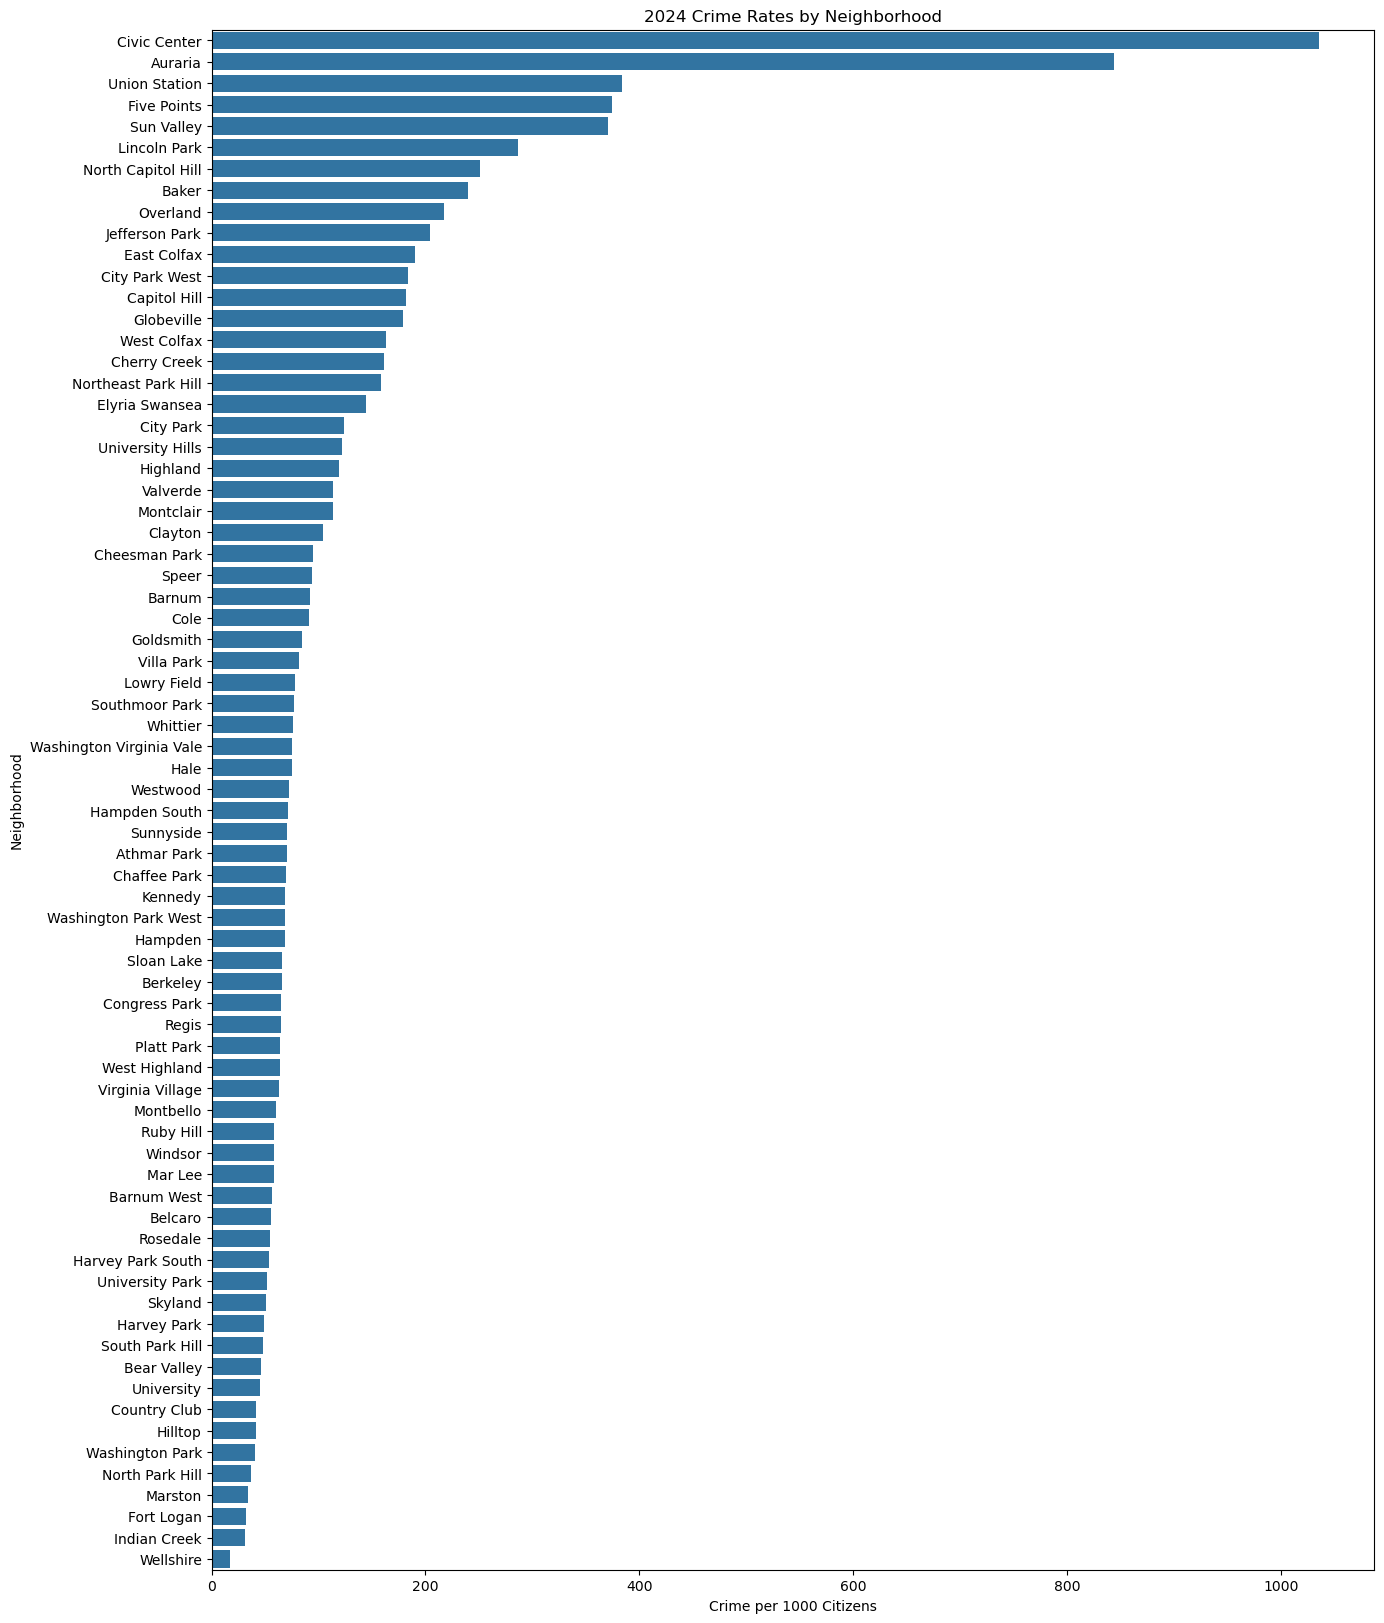

In [154]:
grouped['2024_CRIME_RATE'] = grouped['INCIDENT_ID'] / grouped['SUM_POPULATION_2010'] * 1000

crime_rate_by_neighborhood = grouped['2024_CRIME_RATE'].sort_values(ascending=False).reset_index(name="COUNT")

plt.figure(figsize=(15, 20))
sns.barplot(data=crime_rate_by_neighborhood, y="NEIGHBORHOOD_CLEAN", x="COUNT")
plt.title("2024 Crime Rates by Neighborhood")
plt.ylabel("Neighborhood")
plt.xlabel("Crime per 1000 Citizens")
plt.show()

## Effect of Weather on Crime Rates